In [3]:
## Loading necessary modules and data
import os
import time
import matplotlib.pyplot as plt
from IPython import display

import numpy as np
from dtaidistance import dtw

from cobras_ts.cobras_dtw import COBRAS_DTW
from cobras_ts.querier.notebookquerier_ts import NotebookQuerierTS

data_path = '/home/toon/cobras_ts/data/CBF_TEST_SAMPLE'
budget = 100
alpha = 0.5
window = 10

data = np.loadtxt(data_path, delimiter=',')
series = data[:,1:] # you should only do this if your first column are class labels, as they are in the UCR files
series = series[:10,:] # taking only the first 10 series for example purposes

In [4]:
## Constructing the pairwise affinity matrix
dists = dtw.distance_matrix(series, window=int(0.01 * window * series.shape[1]))
dists[dists == np.inf] = 0
dists = dists + dists.T - np.diag(np.diag(dists))
affinities = np.exp(-dists * alpha)

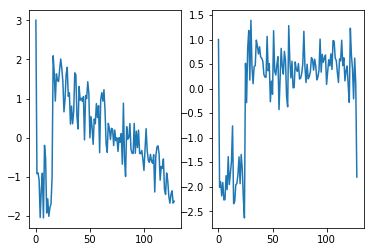

Should the following instances be in the same cluster?  3 and 9 [Y/n] 

In [ ]:
## Starting the clustering process
## Queried pairs will be plotted in the notebook
## A must-link is given by entering 'Y' in the notebook prompt, a cannot-link by entering 'n'.
## Each time an intermediate clustering is shown, you can decide to stop clustering (by entering 'n' in the prompt),\
## or continue answering queries (by entering  'Y' in the prompt).
clusterer = COBRAS_DTW(affinities, NotebookQuerierTS(data), budget)
clustering, intermediate_clusterings, runtimes, ml, cl = clusterer.cluster()

In [ ]:
## After clustering, you can ask for the cluster labeling.
print(clustering.construct_cluster_labeling())